In [46]:
#import Libraries
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
from patsy import dmatrices
from sklearn.linear_model import LogisticRegression 
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.model_selection import cross_val_score 
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve


In [2]:
#Reading Data
data=sm.datasets.fair.load_pandas().data
data

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs
0,3.0,32.0,9.0,3.0,3.0,17.0,2.0,5.0,0.111111
1,3.0,27.0,13.0,3.0,1.0,14.0,3.0,4.0,3.230769
2,4.0,22.0,2.5,0.0,1.0,16.0,3.0,5.0,1.400000
3,4.0,37.0,16.5,4.0,3.0,16.0,5.0,5.0,0.727273
4,5.0,27.0,9.0,1.0,1.0,14.0,3.0,4.0,4.666666
...,...,...,...,...,...,...,...,...,...
6361,5.0,32.0,13.0,2.0,3.0,17.0,4.0,3.0,0.000000
6362,4.0,32.0,13.0,1.0,1.0,16.0,5.0,5.0,0.000000
6363,5.0,22.0,2.5,0.0,2.0,14.0,3.0,1.0,0.000000
6364,5.0,32.0,6.0,1.0,3.0,14.0,3.0,4.0,0.000000


In [3]:
#Add additional column to know affairs details
data['affair'] = (data.affairs>0).astype(int)

In [5]:
#Splitting X,y records using patsy-dmatrices
y, X = dmatrices('affair ~ rate_marriage + age +yrs_married + children + religious + educ +C(occupation) + C(occupation_husb)',data, return_type="dataframe")

In [6]:
#changing the 2-d to 1-d
np.ravel(y)

array([1., 1., 1., ..., 0., 0., 0.])

In [9]:
#rename the columns 
X = X.rename(columns =
{'C(occupation)[T.2.0]':'occ_2',
'C(occupation)[T.3.0]':'occ_3',
'C(occupation)[T.4.0]':'occ_4',
'C(occupation)[T.5.0]':'occ_5',
'C(occupation)[T.6.0]':'occ_6',
'C(occupation_husb)[T.2.0]':'occ_husb_2',
'C(occupation_husb)[T.3.0]':'occ_husb_3',
'C(occupation_husb)[T.4.0]':'occ_husb_4',
'C(occupation_husb)[T.5.0]':'occ_husb_5',
'C(occupation_husb)[T.6.0]':'occ_husb_6'})

In [10]:
#include the additional column to know who are not interested in their marriage
#more chance for affairs
X['Not_good_in_relationship']=(X.rate_marriage<4).astype(int)

In [14]:
#taken the necessary columns to build the model
X=X[['occ_2', 'occ_3', 'occ_4', 'occ_5', 'occ_6', 'occ_husb_2','occ_husb_3', 'occ_husb_4', 'occ_husb_5', 'occ_husb_6', 'rate_marriage','age', 'yrs_married','Not_good_in_relationship']]



In [35]:
#splitting the records
X_train,X_test,Y_train,Y_test=train_test_split(X,y,test_size=0.2)

In [39]:
#Logisticregression
LR=LogisticRegression()

In [40]:
#Fitting the values
LR.fit(X_train,Y_train)

d:\Profiles\sdhanapal\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [56]:
#Evaluating the test results
pred=LR.predict(X_test)

In [55]:
print('the accuracy of the model is',accuracy_score(Y_test,pred))

the accuracy of the model is 0.7386185243328101


In [52]:
print('the confusion matrix values are \n',confusion_matrix(Y_test,pred))

the confusion matrix values are 
 [[809  65]
 [268 132]]


In [48]:
print(classification_report(Y_test,pred))

              precision    recall  f1-score   support

         0.0       0.75      0.93      0.83       874
         1.0       0.67      0.33      0.44       400

    accuracy                           0.74      1274
   macro avg       0.71      0.63      0.64      1274
weighted avg       0.73      0.74      0.71      1274



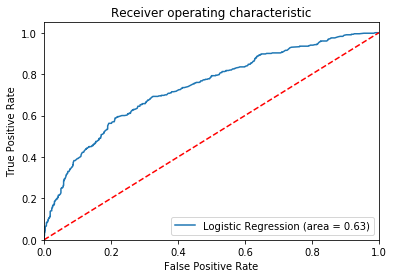

In [61]:
#performing ROC curve
logit_roc_auc = roc_auc_score(Y_test,pred)
fpr, tpr, thresholds = roc_curve(Y_test,LR.predict_proba(X_test)[:,-1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()